Column Names in the Dataset:
Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

Cleaned Column Names:
Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usa

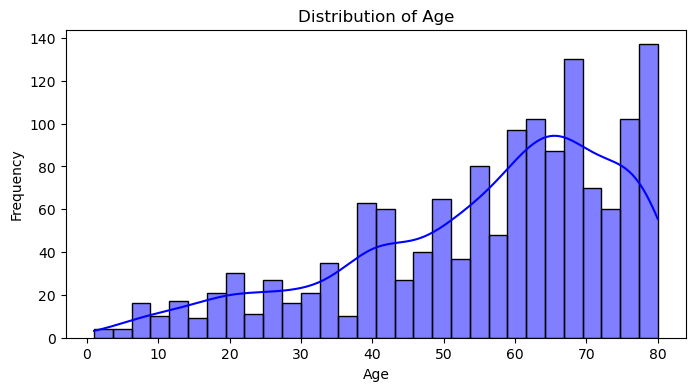

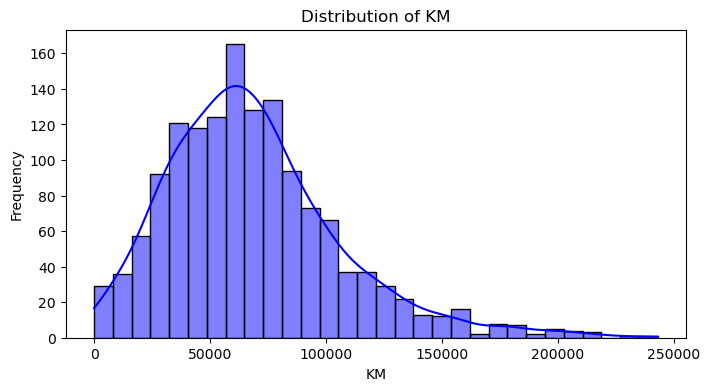

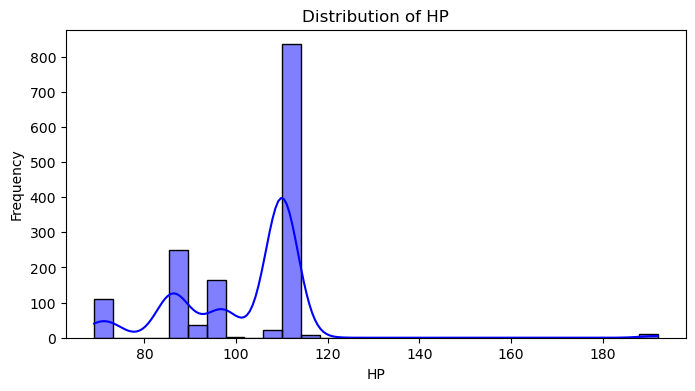

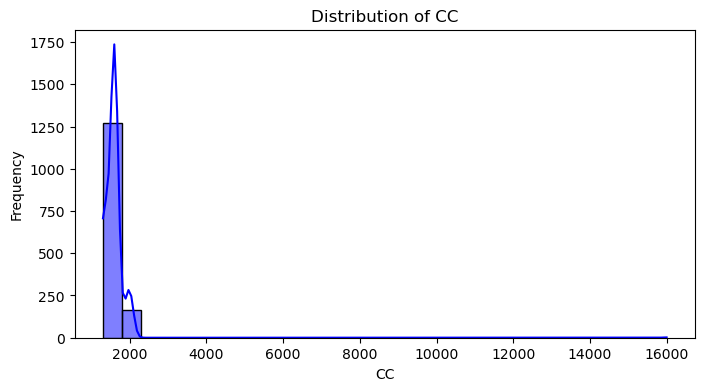

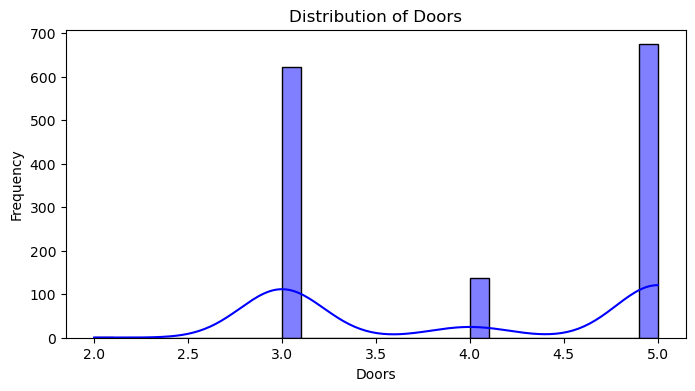

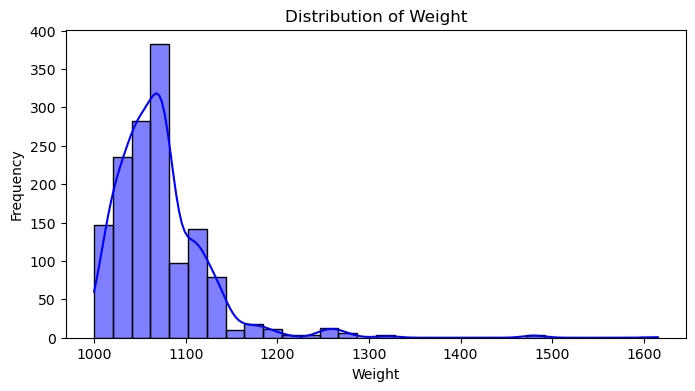

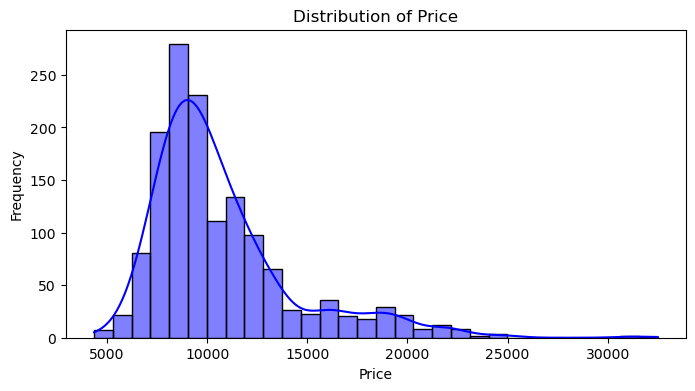

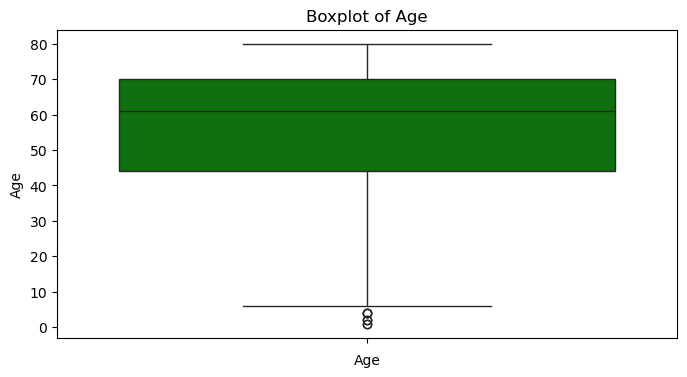

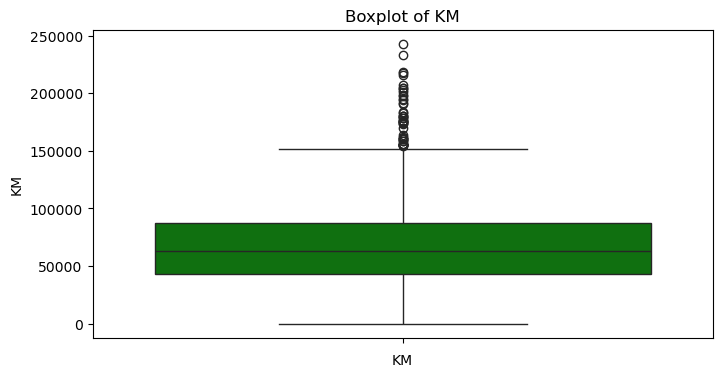

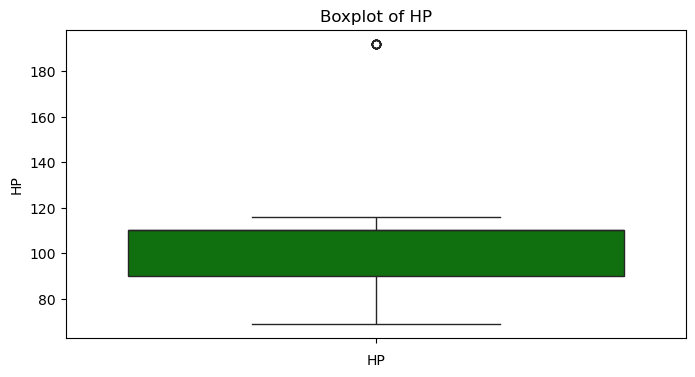

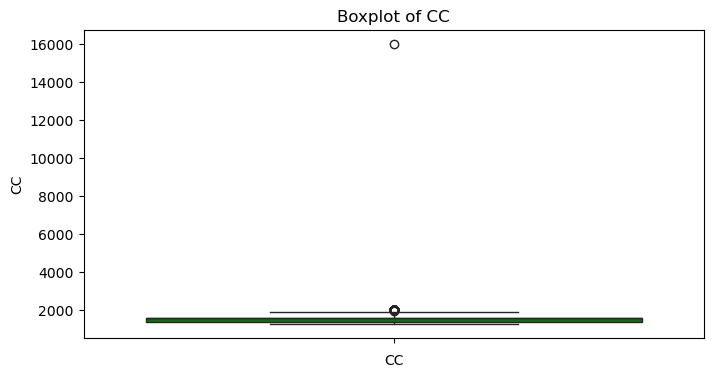

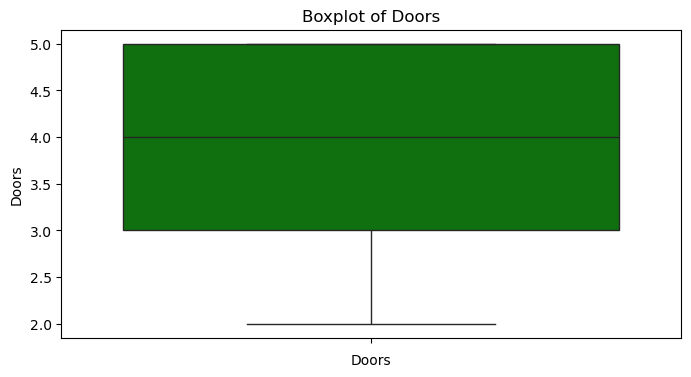

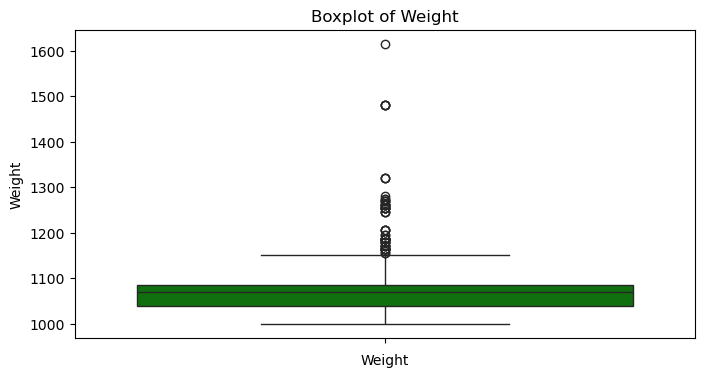

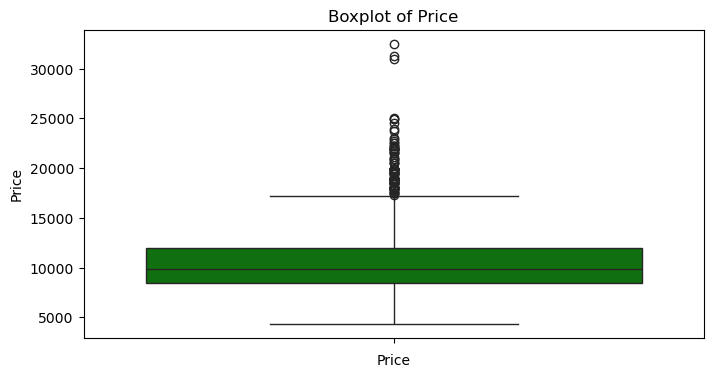

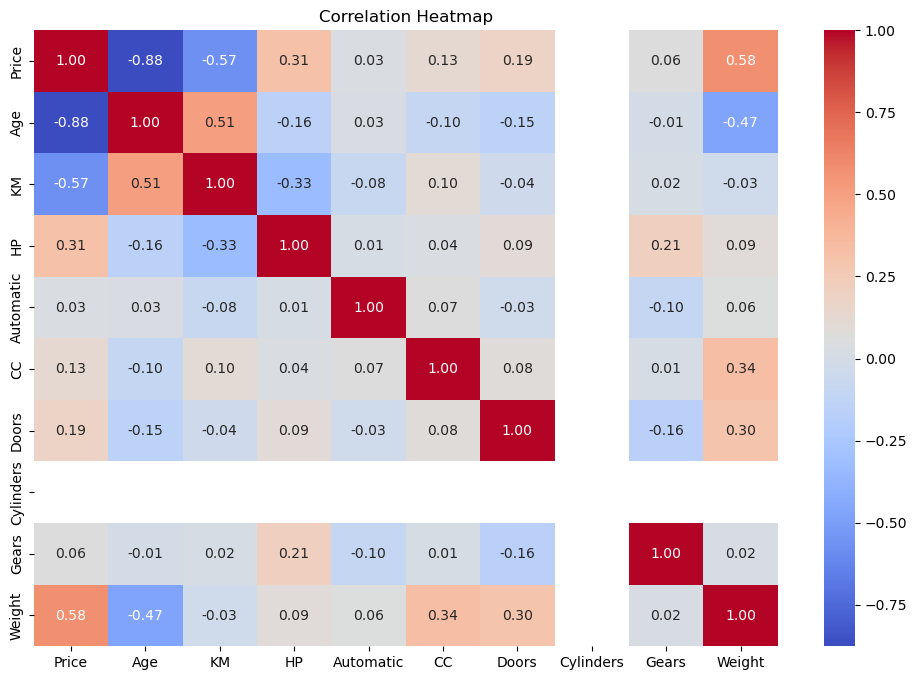


Linear Regression Model:
Mean Squared Error: 2224306.04
R-squared: 0.83

Ridge Regression Model:
Mean Squared Error: 2219203.03
R-squared: 0.83

Lasso Regression Model:
Mean Squared Error: 2223975.65
R-squared: 0.83

Model Comparison:
Linear Regression: MSE = 2224306.04, R-squared = 0.83
Ridge Regression: MSE = 2219203.03, R-squared = 0.83
Lasso Regression: MSE = 2223975.65, R-squared = 0.83


In [16]:
# Multiple Linear Regression Analysis on Toyota Corolla Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = r"C:\Users\User\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv"  # Path from where file is being extracted
data = pd.read_csv(file_path)

# Rename columns to match expected names
data.rename(columns={
    'Age_08_04': 'Age',
    'Fuel_Type': 'FuelType',
    'cc': 'CC'
}, inplace=True)

# Inspect and clean column names
print("Column Names in the Dataset:")
print(data.columns)
data.columns = data.columns.str.strip()  # Remove any extra spaces
print("\nCleaned Column Names:")
print(data.columns)

# Display basic dataset information
print("Dataset Information:")
data.info()
print("\nFirst Five Rows:")
print(data.head())

# Step 1: Exploratory Data Analysis (EDA)
print("\nStatistical Summary:")
print(data.describe())

# Visualizations
# Histograms for numerical variables
numerical_columns = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Price']
for column in numerical_columns:
    if column in data.columns:  # Check if the column exists
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

# Boxplots for numerical variables
for column in numerical_columns:
    if column in data.columns:  # Check if the column exists
        plt.figure(figsize=(8, 4))
        sns.boxplot(data[column], color='green')
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 2: Data Preprocessing
# Handle categorical variables and scaling
categorical_columns = ['FuelType', 'Automatic']
numerical_features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Step 3: Split the dataset into training and testing sets
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build Multiple Linear Regression Models
# Define the pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Model:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Build Ridge Regression Model
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression Model:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")

# Build Lasso Regression Model
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression Model:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")

# Step 5: Compare and Summarize Results
print("\nModel Comparison:")
print(f"Linear Regression: MSE = {mse:.2f}, R-squared = {r2:.2f}")
print(f"Ridge Regression: MSE = {mse_ridge:.2f}, R-squared = {r2_ridge:.2f}")
print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R-squared = {r2_lasso:.2f}")
